In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загрузим библиотеки

import plotly.io as pio
import plotly.express as px
import pandas.plotting as pd_plotting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn


# **1. Подготовка и тщательный анализ данных**

## ***1.1 Загрузка и просмотр данных***

Загрузим данные из файлов:

*   data_description.txt;
*   Best Songs on Spotify from 2000-2023.csv.

data_description.txt - описание данных

In [ ]:
from typing_extensions import DefaultDict

# Что представляют из себя данные файла "data_description.txt"?

with open('/content/drive/MyDrive/Data Science/Дипломный проект/data_description.txt', 'r', errors='ignore') as f:
    data_description = f.read()
    print(data_description)

About Dataset

Context

The top songs for every year from 2000-2023

Content

2385 songs
14 variables

Features

* Title name of song
* Artist  Name of the Artist
* Genre- the genre of the track
* Year- the release year of the recording. Note that due to vagaries of releases, re-releases, re-issues and general madness, sometimes the release years are not what you'd expect.
* Beats Per Minute (BPM)- The tempo of the song.
* Energy- The energy of a song - the higher the value, the more energtic. song
* Danceability- The higher the value, the easier it is to dance to this song.
* Loudness (dB)- The higher the value, the louder the song.
* Liveness- The higher the value, the more likely the song is a live recording.
* Valence- The higher the value, the more positive mood for the song.
* Duration- The length of the song.
* Acousticness- The higher the value the more acoustic the song is.
* Speechiness- The higher the value the more spoken word the song contains.
* Popularity- The higher the

Best Songs on Spotify from 2000-2023.csv - используемый датасет

In [ ]:
# Что представляют из себя данные файла "Best Songs on Spotify from 2000-2023.csv"?

Best_Songs_Spotify = pd.read_csv("/content/drive/MyDrive/Data Science/Дипломный проект/Best Songs on Spotify from 2000-2023.csv", sep = ';')
Best_Songs_Spotify.head(5)

title          artist         top genre  \
0                                 Flowers     Miley Cyrus               pop   
1                       Cupid - Twin Ver.     FIFTY FIFTY  k-pop girl group   
2                                    BESO         ROSALÍA               pop   
3                      Boy's a liar Pt. 2  PinkPantheress       bronx drill   
4  Creepin' (with The Weeknd & 21 Savage)    Metro Boomin               rap   

   year  bpm  energy  danceability   dB  liveness  valence  duration  \
0  2023  118      68             71  -4         3       65       200   
1  2023  120      59             78  -8        35       73       174   
2  2023   95      64             77  -7        17       53       195   
3  2023  133      81             70  -8        25       86       131   
4  2022   98      62             72  -6         8       17       222   

   acousticness  speechiness   popularity  
0             6             7          98  
1            44             3          97  
2            74            14          96  
3            25             5          96  
4            42             5          96

## ***1.2 Анализ данных***

In [ ]:
# Ознакомимся с данными

Best_Songs_Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2385 non-null   object
 1   artist         2385 non-null   object
 2   top genre      2385 non-null   object
 3   year           2385 non-null   int64 
 4   bpm            2385 non-null   int64 
 5   energy         2385 non-null   int64 
 6   danceability   2385 non-null   int64 
 7   dB             2385 non-null   int64 
 8   liveness       2385 non-null   int64 
 9   valence        2385 non-null   int64 
 10  duration       2385 non-null   int64 
 11  acousticness   2385 non-null   int64 
 12  speechiness    2385 non-null   int64 
 13  popularity     2385 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 261.0+ KB


In [ ]:
# Проверим наличие пропущенных значений

Best_Songs_Spotify.isnull().sum()

title            0
artist           0
top genre        0
year             0
bpm              0
energy           0
danceability     0
dB               0
liveness         0
valence          0
duration         0
acousticness     0
speechiness      0
popularity       0
dtype: int64

In [ ]:
# Посмотрим на размер этой таблицы

Best_Songs_Spotify.shape

(2385, 14)

In [ ]:
# Узнаем количество жанров музыки
unique_values = Best_Songs_Spotify['top genre'].unique()

count_of_unique_values = np.count_nonzero(unique_values)

print(count_of_unique_values)    

266


In [ ]:
# Проверим наличие дупликатов
Best_Songs_Spotify.duplicated().sum()

0

In [ ]:
Best_Songs_Spotify.describe()

year          bpm       energy  danceability            dB  \
count  2385.000000  2385.000000  2385.000000    2385.000000  2385.000000   
mean   2011.116981   119.783648    69.792453      67.034801    -5.771488   
std       6.748364    27.273075    16.164609      13.719049     2.072153   
min    1985.000000    60.000000     6.000000      18.000000   -18.000000   
25%    2005.000000    98.000000    59.000000      59.000000    -7.000000   
50%    2011.000000   120.000000    71.000000      68.000000    -5.000000   
75%    2017.000000   134.000000    82.000000      77.000000    -4.000000   
max    2023.000000   211.000000   100.000000      98.000000     0.000000   

          liveness      valence     duration  acousticness  speechiness   \
count  2385.000000  2385.000000  2385.000000   2385.000000   2385.000000   
mean     17.787002    54.233962   225.946751     15.612998     10.112369   
std      13.629287    22.458084    43.226704     20.277746      9.520815   
min       2.000000     4.000000   115.000000      0.000000      2.000000   
25%       9.000000    37.000000   200.000000      2.000000      4.000000   
50%      12.000000    54.000000   221.000000      7.000000      6.000000   
75%      23.000000    73.000000   246.000000     22.000000     12.000000   
max      84.000000    97.000000   688.000000     98.000000     58.000000   

        popularity  
count  2385.000000  
mean     70.526625  
std      11.419740  
min       5.000000  
25%      64.000000  
50%      72.000000  
75%      79.000000  
max      98.000000

In [ ]:
pd.set_option('display.max_rows', None)

Best_Songs_Spotify['top genre'].value_counts()

dance pop                      460
pop                            250
atl hip hop                     95
alternative metal               55
edm                             54
contemporary r&b                43
boy band                        41
hip hop                         39
neo mellow                      37
art pop                         36
canadian pop                    34
chicago rap                     34
east coast hip hop              33
british soul                    33
r&b                             31
barbadian pop                   31
canadian hip hop                30
detroit hip hop                 28
big room                        27
reggaeton                       25
alternative rock                24
modern rock                     22
pop rap                         21
contemporary country            20
hip pop                         20
permanent wave                  19
australian dance                19
conscious hip hop               18
melodic rap         

Фильтруем жанры

In [ ]:
# Пересохраняем датасет в новую переменную
df = Best_Songs_Spotify

# Переименование всех вхождений "hip hop" в "hip-hop"
df['top genre'] = df['top genre'].replace('hip hop', 'hip-hop', regex=True)

# Классификация жанров
df['genre_classification'] = np.where(df['top genre'].str.contains(r'pop$|rap$|rock$|hip-hop$', regex=True),
                                      df['top genre'].str.replace(r'.*(pop|rap|rock|hip-hop)$', r'\1', regex=True),
                                      'others')

# Вывод результатов
print(df[['top genre', 'genre_classification']])

                        top genre genre_classification
0                             pop                  pop
1                k-pop girl group               others
2                             pop                  pop
3                     bronx drill               others
4                             rap                  rap
5         gen z singer-songwriter               others
6                       reggaeton               others
7                       afrobeats               others
8                             pop                  pop
9                     bedroom pop                  pop
10                       big room               others
11                            pop                  pop
12      canadian contemporary r&b               others
13                     piano rock                 rock
14              argentine hip-hop              hip-hop
15      canadian contemporary r&b               others
16        gen z singer-songwriter               others
17        

In [ ]:
# Количество жанров после обработки
unique_values = df['genre_classification'].unique()

count_of_unique_values = np.count_nonzero(unique_values)

print(count_of_unique_values) 

5


In [ ]:
pd.set_option('display.max_rows', None)

df['genre_classification'].value_counts()

pop        994
others     813
hip-hop    304
rap        164
rock       110
Name: genre_classification, dtype: int64

# ***1.3 Визуализация данных***

In [ ]:
features = ['bpm', 'energy', 'dB', 'liveness', 'valence', 'duration', 'acousticness', 'popularity']

numerical_data = Best_Songs_Spotify[features]

# Reshape the dataframe to long format
long_data = pd.melt(numerical_data, var_name='Параметр', value_name='Значение')

# Create bivariate boxplots
fig_box = px.box(long_data, x='Параметр', y='Значение', title='Двумерная диаграмма числовых параметров')

# Show the plot
fig_box.show()

In [ ]:
for feature in features:
    # Histogram
    fig_hist = px.histogram(Best_Songs_Spotify, x=feature, title=f'Распределение {feature}')
    fig_hist.show()

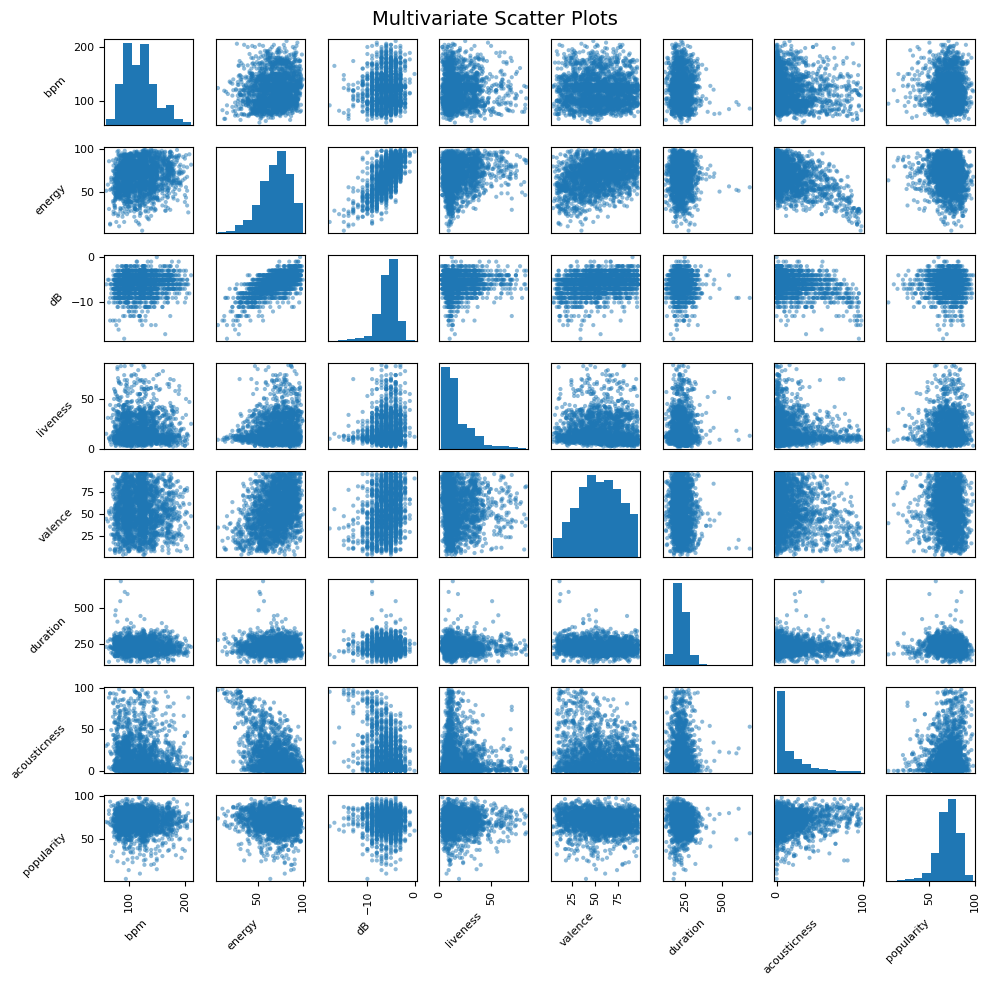

In [ ]:
# Create a scatter matrix
scatter_matrix = pd_plotting.scatter_matrix(Best_Songs_Spotify[features], figsize=(10, 10))

# Set plot labels and titles
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=45, ha='right')
    ax.set_ylabel(ax.get_ylabel(), fontsize=8, rotation=45, ha='right')

plt.suptitle('Multivariate Scatter Plots', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the genre counts
genre_counts = df["genre_classification"].value_counts()

# Create a pie chart
fig = px.pie(df, names=genre_counts.index, values=genre_counts.values)
fig.show()

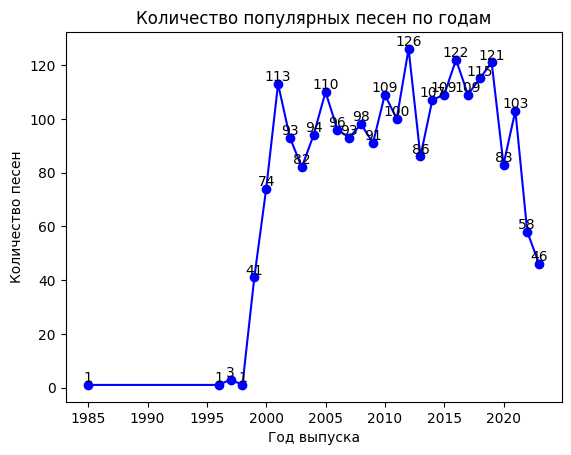

In [ ]:
# Укажите названия столбцов для построения графика
x_column = 'Год выпуска'
y_column = 'Количество песен'

# Получите значения и их подсчеты для столбца Год выпуска
x_values = Best_Songs_Spotify['year'].value_counts().sort_index()
y_values = x_values.values

# Создаем график
fig, ax = plt.subplots()
ax.plot(x_values.index, y_values, marker='o', linestyle='-', color='b')

# Настраиваем график при необходимости
ax.set_title('Количество популярных песен по годам')
ax.set_xlabel(x_column)
ax.set_ylabel(y_column)

# Добавляем количество значений над каждой точкой
for x, y in zip(x_values.index, y_values):
    ax.text(x, y, str(y), ha='center', va='bottom')

# Отображаем график
plt.show()


# ***1.4 Обучение***

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_learn = df

# Создание объекта LabelEncoder
label_encoder = LabelEncoder()

# Применение Label Encoding к столбцу 'genre_classification'
df['genre_label'] = label_encoder.fit_transform(df['genre_classification'])

X = df_learn.drop(columns=["top genre", "title", "artist", "year", "popularity", "genre_classification", "genre_label"])
y = df_learn["genre_label"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

# Нормализация данных
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_normed = scaler.transform(X_train)
X_valid_normed = scaler.transform(X_valid)

## 1.4.1 K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# kNN
clf_knn = KNeighborsClassifier().fit(X_train, y_train)
y_knn = clf_knn.predict(X_valid)
y_knn_proba = clf_knn.predict_proba(X_valid)

## 1.4.2 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Линейный классификатор
log_reg = LogisticRegression(random_state=0, n_jobs=-1).fit(X_train, y_train)
y_log_reg = log_reg.predict(X_valid)
y_log_reg_proba = log_reg.predict_proba(X_valid)

## 1.4.3 RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Случайный лес

forest = RandomForestClassifier()

# Задание диапазона значений для количества деревьев и глубины дерева
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 30]
}

# Использование кросс-валидации и сеточного поиска для определения оптимальных значений
grid_search = GridSearchCV(forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Получение оптимальных значений гиперпараметров
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

print("Best n_estimators:", best_n_estimators)
print("Best max_depth:", best_max_depth)


Best n_estimators: 500
Best max_depth: 15


In [ ]:
# Обучаем на оптимальных параметрах

forest = RandomForestClassifier(n_estimators=500, max_depth=15, class_weight='balanced')

forest.fit(X_train, y_train)
y_forest = forest.predict(X_valid)
y_forest_proba = forest.predict_proba(X_valid)

## 1.4.4 DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Решающие деревья
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
predictions_proba = model.predict_proba(X_valid)

# ***1.5 Анализ полученных результатов***

In [ ]:
from sklearn import metrics
from sklearn.metrics import log_loss

knn_logloss = log_loss(y_valid, y_knn_proba, labels=clf_knn.classes_)
print('Log loss для kNN:', knn_logloss)

log_reg_logloss = log_loss(y_valid, y_log_reg_proba, labels=log_reg.classes_)
print('Log loss для log reg:', log_reg_logloss)

forest_logloss = log_loss(y_valid, y_forest_proba, labels=forest.classes_)
print('Log loss для RandomForest:', forest_logloss)

decision_tree_logloss = log_loss(y_valid, predictions_proba, labels=forest.classes_)
print('Log loss для DecisionTree:', decision_tree_logloss)

Log loss для kNN: 6.714097104519304
Log loss для log reg: 1.1754397008410222
Log loss для RandomForest: 1.1457685027473388
Log loss для DecisionTree: 21.686642605192077


In [ ]:
# Для примера посчитаем accuracy, precision и recall

print('ACCURACY:\n'
      '-knn =', metrics.accuracy_score(y_valid, y_knn), '\n'
      '-log_reg =', metrics.accuracy_score(y_valid, y_log_reg), '\n'
      '-RandomForest =', metrics.accuracy_score(y_valid, y_forest), '\n'
      '-DecisionTree =', metrics.accuracy_score(y_valid, predictions))

ACCURACY:
-knn = 0.4528301886792453 
-log_reg = 0.5073375262054507 
-RandomForest = 0.5136268343815513 
-DecisionTree = 0.39832285115303984
